In [2]:
import sys; sys.path.append('/Users/prajayshah/OneDrive - University of Toronto/PycharmProjects/Vape/utils')
sys.path.append('/Users/prajayshah/OneDrive - University of Toronto/PycharmProjects/utils_pj')
import funcs_pj as pjf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
# set up plotting settings to give real time value information
plt.rcParams['figure.figsize'] = [20,3]

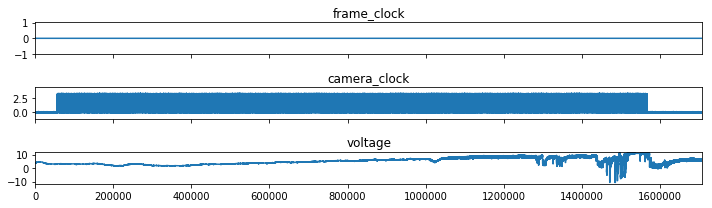

In [5]:
input_path = '/Volumes/Extreme SSD/oxford-data/2020-02-25/2020-02-25_HF80_p09.paq'

paq = pjf.paq_read(input_path, plot=True)
camera = paq['data'][1]
voltage = paq['data'][2]

In [6]:
# work on bringing in Ca imaging rois now
t09_left_H = np.loadtxt('/Volumes/Extreme SSD/oxford-data/2020-02-25/2020-02-25_t09_leftH.txt', skiprows=1)[:,1]
t09_right_H = np.loadtxt('/Volumes/Extreme SSD/oxford-data/2020-02-25/2020-02-25_t09_rightH.txt', skiprows=1)[:,1]

OSError: /Volumes/Extreme SSD/oxford-data/2020-02-25/2020-02-25_t09_leftH.txt not found.

#### data: t09

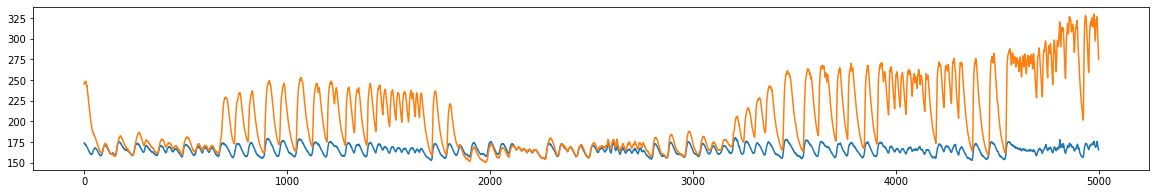

In [5]:
plt.plot(t09_left_H)
plt.plot(t09_right_H)

In [7]:
## get start frames of camera clock
# use threshold and then find large spaces in the difference between the indexes

frames = pjf.threshold_detect(camera, 1.0)

# the start and stops of camera frames are where the second derivative of frames exceeds the regular values
diff = np.diff(frames)

cam_stops = frames[np.where(diff > 1000)[0]]
cam_starts = frames[np.where(diff > 1000)[0]+1]

print("First camera clock index:", frames[0])
print("Camera stop indexes:", cam_stops)
print("Camera start indexes: ", cam_starts)
print("last camera clock index:", frames[-1])

voltage_syncd = voltage[frames[0]:frames[-1]]
camfr_syncd = camera[frames[0]:frames[-1]]
frames_syncd = pjf.threshold_detect(camfr_syncd, 1.0); print(frames_syncd)

First camera clock index: 56802
Camera stop indexes: []
Camera start indexes:  []
last camera clock index: 1566841
[      0     300     600 ... 1509139 1509439 1509739]


Camera start: 333
Camera stop: 2000


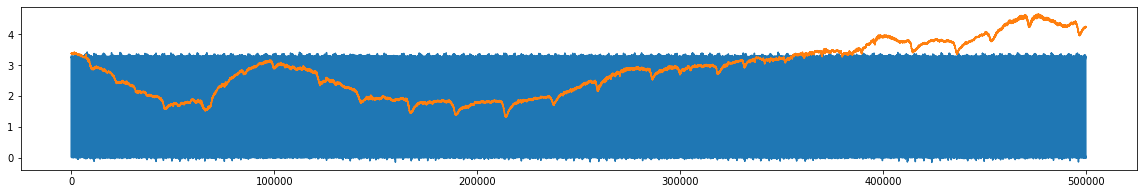

In [8]:
start = 100000
stop = 600000

start_sample, start_frame = pjf.findClosest(frames_syncd, start)
stop_sample, stop_frame = pjf.findClosest(frames_syncd, stop)

print('Camera start:', start_frame)
print('Camera stop:', stop_frame)

volt_ = voltage_syncd[start_sample:stop_sample]
t09_left_H_ = t09_left_H[start_frame:stop_frame]
t09_right_H_ = t09_right_H[start_frame:stop_frame]

plt.plot(camfr_syncd[start_sample:stop_sample])
plt.plot(volt_)


In [6]:
# plt.plot(c[start:stop])
# sos = signal.butter(1, 2, btype='hp', output='sos', fs=10000)
# filtered = signal.sosfilt(sos, v)[start:stop]
# plt.plot(filtered)

# sos = signal.butter(2, 2, btype='hp', output='sos', fs=10000)
# filtered = signal.sosfilt(sos, v)[start:stop]
# plt.plot(filtered)

# sos = signal.butter(3, 2, btype='hp', output='sos', fs=10000)
# filtered = signal.sosfilt(sos, v)[start:stop]
# plt.plot(filtered)

# sos = signal.butter(1, (2,1000), btype='bandpass', output='sos', fs=10000)
# filtered = signal.sosfilt(sos, v)[start:stop]
# #plt.plot(v[start:stop])
# plt.plot(filtered)

In [10]:
# upsample camera gcamp signal to voltage recording levels
t09_left_H_up = signal.resample(t09_left_H_, len(volt_))
t09_right_H_up = signal.resample(t09_right_H_, len(volt_))

t09_left_H, t09_right_H:
Frames: 56802 to 61802


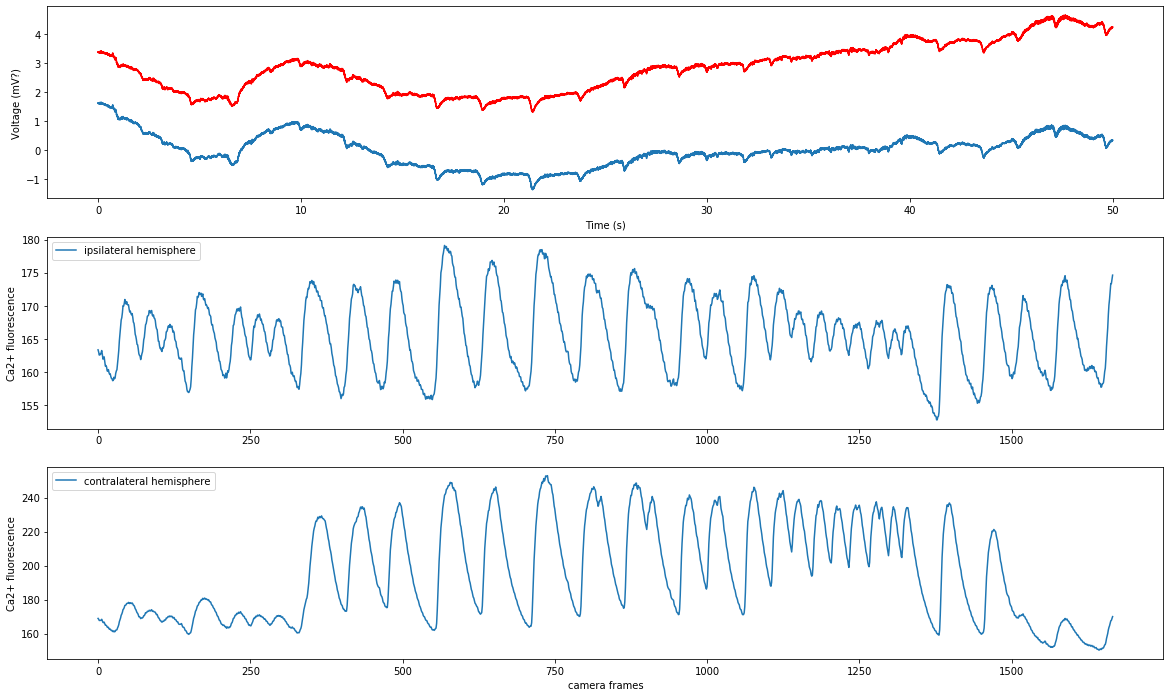

In [24]:
# plot LFP signal with GCaMP signal
print('t09_left_H, t09_right_H:')
print('Frames: %d to %d' % (frames[0], frames[0]+len(t09_left_H)))

# define x range in time
x = np.linspace(0,len(volt_)/10000,len(volt_))

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20,12)); fig.subplots_adjust(hspace=0.2)
ax1.plot(x, volt_, c='red')
# ax1.plot(x, signal.detrend(volt_))
ax1.set_ylabel('Voltage (mV?)')
ax1.set_xlabel('Time (s)');
ax2.plot(t09_left_H_)
ax2.set_ylabel('Ca2+ fluorescence')
ax2.legend(['ipsilateral hemisphere'], loc=2)
ax3.plot(t09_right_H_)
ax3.set_ylabel('Ca2+ fluorescence')
ax3.legend(['contralateral hemisphere'], loc=2)
ax3.set_xlabel('camera frames');

# plt.savefig('test.svg', format='svg', transparent=True)

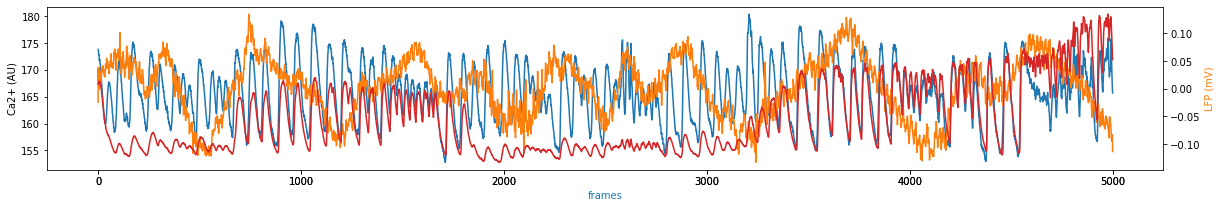

In [95]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(t09_left_H[:,1], color="C0")
ax.set_xlabel("frames", color="C0")
ax.set_ylabel("Ca2+ (AU)")

ax2.plot(downsampled_lfp_t09, color="C1")
ax2.yaxis.tick_right()
ax2.set_ylabel('LFP (mV)', color="C1")
ax2.yaxis.set_label_position('right')

ax3.plot(t09_right_H[:,1], color="C3")
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()

#### data t03

In [116]:
t03_roi = np.loadtxt('/Volumes/Extreme SSD/oxford-data/2020-02-25/2020-02-25_t03_oneroi.txt', skiprows=1)

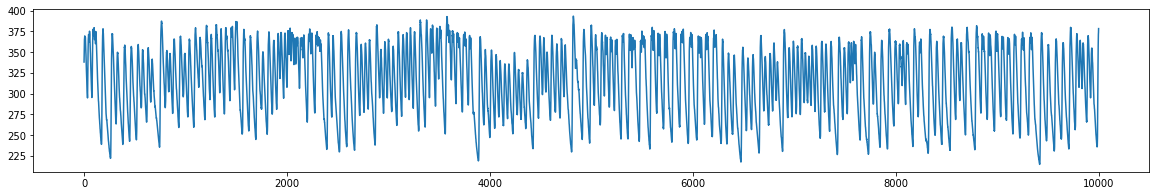

In [118]:
plt.plot(t03_roi[:,1])

#### combine tiffs into single mptiff

In [12]:
# convert single tiff frames into tiff stack
# %run ./setup_notebook.ipynb
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils')
print(sys.path)
import glob
import numpy as np
from skimage.external import tifffile
import tifffile as tf
import os
import alloptical_utils_pj as ao
import utils_funcs_pj as pjf

['/home/pshah/Documents/code/Vape/jupyter', '/home/pshah/anaconda3/lib/python37.zip', '/home/pshah/anaconda3/lib/python3.7', '/home/pshah/anaconda3/lib/python3.7/lib-dynload', '', '/home/pshah/anaconda3/lib/python3.7/site-packages', '/home/pshah/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/pshah/.ipython', '/home/pshah/Documents/code/Vape/utils', '/home/pshah/Documents/code/Vape/utils']


In [17]:
list = ['t01', 't02', 't03', 't04', 't07']

for i in list:
    tiff_paths = '/Volumes/Extreme SSD/oxford-data/2020-03-06/%s/*.tif' % i
    ao.make_tiff_stack(tiff_paths, save_as='/Volumes/Extreme SSD/oxford-data/2020-03-06/%s.tif' % i)